# CSE428: Coding Assignment-2

In [ ]:
NAME = "Fateha Jannat Printia"
ID = "20301357"
COLLABORATORS_ID = ["", ""]

This assignment contains 4 tasks (3 guided, 1 unguided). Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Always use ```method='auto'``` while using the correlation function, unless you want to see how fast/slow a method is.)




We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [ ]:
# Import libraries

from skimage.io import imread
from skimage import data, img_as_float,io
from skimage.color import rgb2gray

from skimage.util import random_noise

import numpy as np

from scipy import signal

import matplotlib.pyplot as plt

In [ ]:
# Define helper functions
def generate_symmetric_kernel(size):
    kernel = np.ones((size, size))

    for row in range((size//2)+1):
        for col in range((size//2)+1):
            kernel[row,col]=row*col+1
            kernel[abs(row-(size-1)),col]=row*col+1
            kernel[row,abs(col-(size-1))]=row*col+1
            kernel[abs(row-(size-1)),abs(col-(size-1))]=row*col+1

    return kernel

def generate_asymmetric_kernel(size):
    kernel = np.ones((size, size))

    for row in range(size):
        for col in range(size):
            kernel[row,col]=row*col+2

    return kernel

## **Task 1: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


In [ ]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image =imread('l1.jpg')[:,:,0]
image.shape

(512, 512)

In [ ]:
# Define any symmetric kernel of size (105, 105)
kernel_symmetric = generate_symmetric_kernel(105)# TO-BE-COMPLETED

In [ ]:
# Define any asymmetric kernel of size (105, 105)
kernel_asymmetric = generate_asymmetric_kernel(105) # TO-BE-COMPLETED

In [ ]:
# Filter the image with the symmetric kernel using the correlation function

filtered_image_symmetric1 = signal.correlate(image, kernel_symmetric, mode='same', method='auto') # TO-BE-COMPLETED
filtered_image_symmetric2 = signal.convolve(image, kernel_symmetric, mode='same', method='auto') # TO-BE-COMPLETED
# io.imshow(kernel_asymmetric)
# io.imshow(kernel_symmetric)
filtered_image_asymmetric1 = signal.correlate(image, kernel_asymmetric, mode='same', method='auto') # TO-BE-COMPLETED
filtered_image_asymmetric2 = signal.convolve(image, kernel_asymmetric, mode='same', method='auto')

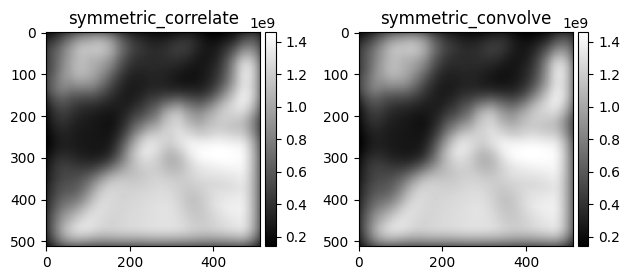

In [ ]:
# Display the images side by side (with proper labeling, which is which)
plt.subplot(1,2,1)
plt.title("symmetric_correlate")
io.imshow(filtered_image_symmetric1,cmap='gray')
plt.subplot(1,2,2)
plt.title("symmetric_convolve")
io.imshow(filtered_image_symmetric2,cmap='gray')

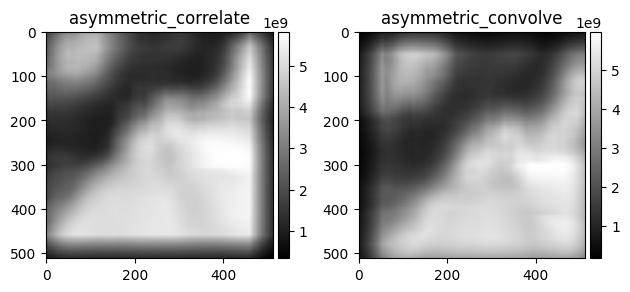

In [ ]:
plt.subplot(1,2,1)
plt.title("asymmetric_correlate")
io.imshow(filtered_image_asymmetric1,cmap='gray')
plt.subplot(1,2,2)
plt.title("asymmetric_convolve")
io.imshow(filtered_image_asymmetric2,cmap='gray')

### **Answer to Task 1.1** <br>

### Write your answer here. Compare the outputs.

When I used a symmetric kernel, I found that co-relation and convulation are the same, even if the symmetric kernel is rotated.
On the other hand, when I used an asymmetric kernel,I got different results for correlation and convolution.

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

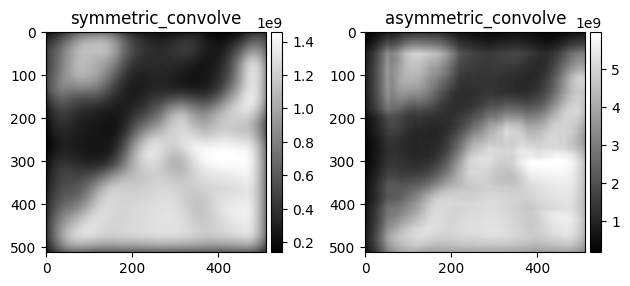

In [ ]:
plt.subplot(1,2,1)
plt.title("symmetric_convolve")
io.imshow(filtered_image_symmetric2,cmap='gray')


plt.subplot(1,2,2)
plt.title("asymmetric_convolve")
io.imshow(filtered_image_asymmetric2,cmap='gray')

### **Answer to Task 1.2** <br>

### Write your answer here. Compare the outputs.

When the outputs of both convolve are compared, the result is changed.

## **Task 2: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

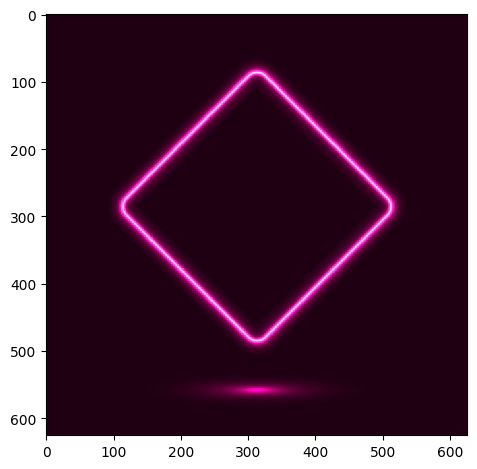

In [ ]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = imread('diamond2.jpg')
io.imshow(image)   # TO-BE-COMPLETED

In [ ]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([[2, 2, 0], # TO-BE-COMPLETED
                     [2, 0, -2], # TO-BE-COMPLETED
                     [0, -2, -2]]) # TO-BE-COMPLETED

kernel_2 = np.array([[0, 2, 2], # TO-BE-COMPLETED
                     [-2, 0, 2], # TO-BE-COMPLETED
                     [-2, -2, 0]]) # TO-BE-COMPLETED

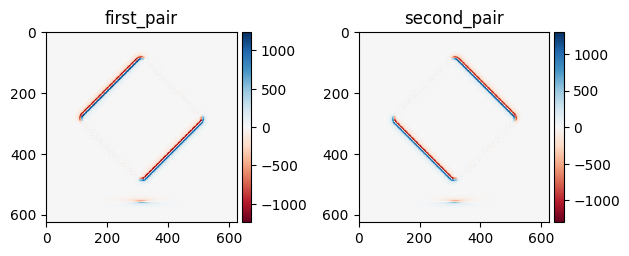

In [ ]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

first_pair_detected =  signal.correlate(image[:,:,0], kernel_1, mode='same', method='auto') # TO-BE-COMPLETED
first_pair_detected +=  signal.correlate(image[:,:,1], kernel_1, mode='same', method='auto')
first_pair_detected +=  signal.correlate(image[:,:,2], kernel_1, mode='same', method='auto')
plt.subplot(1,2,1)
plt.title("first_pair")
io.imshow(first_pair_detected)
# detect the second pair using image filtering with kernel_2

second_pair_detected = signal.correlate(image[:,:,0], kernel_2, mode='same', method='auto') # TO-BE-COMPLETED
second_pair_detected +=  signal.correlate(image[:,:,1], kernel_2, mode='same', method='auto')
second_pair_detected+=  signal.correlate(image[:,:,2], kernel_2, mode='same', method='auto')
plt.subplot(1,2,2)
plt.title("second_pair")
io.imshow(second_pair_detected)


### **Answer to Task 2** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?


The kernels used in edge detection are designed to highlight areas of significant intensity changes in the neighborhood of an image pixel. In the context of edge detection, selecting kernel coefficients strategically can enhance the filter's response to these intensity variations.

For instance, by structuring a kernel with zeroes along the diagonal and non-zero values elsewhere, you create a pattern that amplifies the difference between intensities on opposite sides of an edge.
Similarly, other kernels may be designed to emphasize edges along different orientations.


It is indeed possible to create different kernels to achieve similar edge detection goals. The primary objective is to design kernels that yield notable responses to intensity variations, thereby highlighting edges. The specific coefficients and patterns chosen depend on the intended edge detection characteristics, noise robustness, and edge localization properties.


kernel_1 = np.array([[2, 2, 0],
                     [2, 0, -2],
                     [0, -2, -2]])

kernel_2 = np.array([[0, 2, 2],
                     [-2, 0, 2],
                     [-2, -2, 0]])
so i came up with these kernals

# Task 3: Sharpen with Edge Detectors <br>
### Try to come up with two 5 x 5 filter kernels which are able to detect and sharpen ***the vertical and horizontal edges*** of the windows and bricks<br>

<!-- ![](https://drive.google.com/file/d/15H_wiT-AMl88Hdrhc517yK4UbBJ1jbjw/view?usp=drive_link) -->

[The window+brick wall image can be downloaded from here: https://drive.google.com/file/d/15H_wiT-AMl88Hdrhc517yK4UbBJ1jbjw/view?usp=drive_link]

*Hint: For this task, visualize the 3x3 kernel into a bigger 5x5 one. Both will look almost the same, except for their size.*

In [ ]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = imread('House-Windows.png') # TO-BE-COMPLETED

In [ ]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([ [1, 0, 0, 0,-1], # TO-BE-COMPLETED
                      [1, 0, 0, 0, -1], # TO-BE-COMPLETED
                      [1, 0, 0, 0, -1], # TO-BE-COMPLETED
                      [1, 0, 0, 0, -1], # TO-BE-COMPLETED
                      [1, 0, 0,0, -1],]) # TO-BE-COMPLETED

kernel_2 = np.array([ [2, 2, 2, 2, 2], # TO-BE-COMPLETED
                      [0, 0, 0, 0, 0], # TO-BE-COMPLETED
                      [0, 0, 0, 0, 0], # TO-BE-COMPLETED
                      [0, 0,0, 0, 0], # TO-BE-COMPLETED
                      [-2, -2, -2, -2, -2],]) # TO-BE-COMPLETED

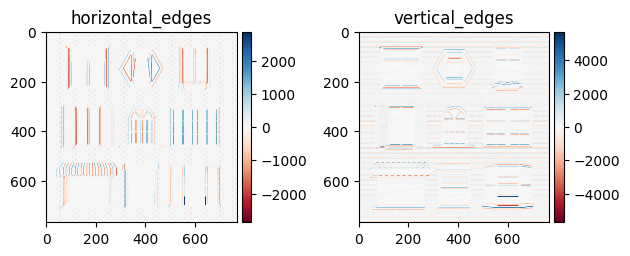

In [ ]:
# detect both types of the edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

horizontal_edges_detected = signal.correlate(image[:,:,0], kernel_1, mode='same', method='auto') # TO-BE-COMPLETED
horizontal_edges_detected += signal.correlate(image[:,:,1], kernel_1, mode='same', method='auto')
horizontal_edges_detected += signal.correlate(image[:,:,2], kernel_1, mode='same', method='auto')
plt.subplot(1,2,1)
plt.title("horizontal_edges")
io.imshow(horizontal_edges_detected)

# detect the second pair using image filtering with kernel_2

vertical_edges_detected =  signal.correlate(image[:,:,0], kernel_2, mode='same', method='auto')  # TO-BE-COMPLETED
vertical_edges_detected +=  signal.correlate(image[:,:,1], kernel_2, mode='same', method='auto')  # TO
vertical_edges_detected +=  signal.correlate(image[:,:,1], kernel_2, mode='same', method='auto')  # TO
plt.subplot(1,2,2)
plt.title("vertical_edges")
io.imshow(vertical_edges_detected)

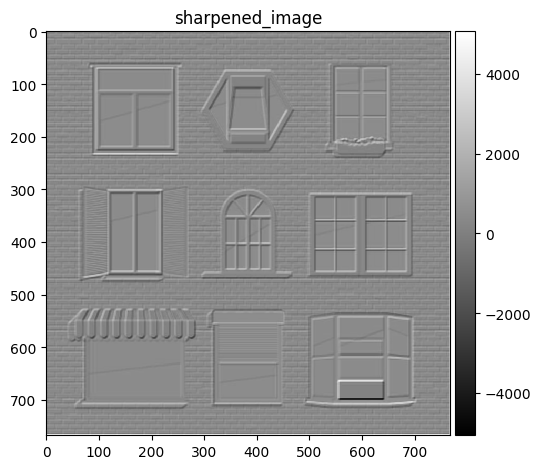

In [ ]:
# plot the sharpened image

main_img_intensity_fraction =   0.8      #
edge_horiz_intensity_fraction = 0.25     #
edge_vert_intensity_fraction =  0.25     # --> You can vary these 3 values to see what happens

sharpened_image =(main_img_intensity_fraction*image[:,:,0]+edge_horiz_intensity_fraction*horizontal_edges_detected+edge_vert_intensity_fraction*vertical_edges_detected) #?+?+?#       # --> weighted sum of the image, horizontal edges & vertical edges
sharpened_image +=(main_img_intensity_fraction*image[:,:,1]+edge_horiz_intensity_fraction*horizontal_edges_detected+edge_vert_intensity_fraction*vertical_edges_detected) #?+?+?#       # --> weighted sum of the image, horizontal edges & vertical edges
sharpened_image +=(main_img_intensity_fraction*image[:,:,2]+edge_horiz_intensity_fraction*horizontal_edges_detected+edge_vert_intensity_fraction*vertical_edges_detected) #?+?+?#       # --> weighted sum of the image, horizontal edges & vertical edges
plt.title("sharpened_image")

io.imshow(sharpened_image,cmap='gray')


### **Answer to Task 3** <br>

*italicized text*### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? How does changing the fraction values affect the sharpening? Among the window and bricks, which ones become more prominent in the final output?


I selected these filters considering the diverse range of edges present in the image, including horizontal, vertical, diagonal, linear, and nonlinear edges. The choice of coefficients is geared towards optimizing the kernel's ability to detect even subtle edges. By emphasizing small differences in intensity through a pattern of coefficients, the kernel becomes sensitive to edges at varying scales.

The design rationale is rooted in achieving edge detection with a high level of sensitivity.
Adjusting coefficients to larger magnitudes or altering their values does not significantly impact the kernel's performance, as it remains adept at identifying edges. This indicates that the kernel excels at capturing edge information, irrespective of the specific coefficient values.

# Task 4: Noise Reduction/Denoising *(Unguided)*<br>
### Use 'gaussian_filter' from scipy.ndimage for this task to denoise two given images: <br> (i) A Noisy Image, (ii) Just Noise filled Image.<br>

<!-- ![](https://drive.google.com/file/d/15H_wiT-AMl88Hdrhc517yK4UbBJ1jbjw/view?usp=drive_link) -->

[(i) Noisy Image: https://drive.google.com/file/d/1I1ye90IggplNRVVtZfFTLXLqQWJNGbCM/view?usp=sharing <br>
 (ii) Just Noise: https://drive.google.com/file/d/13AMtZR8ZCGHVcsw7tOJBgSFDnDhgtL9b/view?usp=sharing]

### Tune the 'sigma' value to obtain different smoothening gaussian kernels. This will give you various degrees of denoising. For image (i), your task is to smoothen the image to get as low noise as possible. For image (ii), your task is to get an almost flat intensity image.

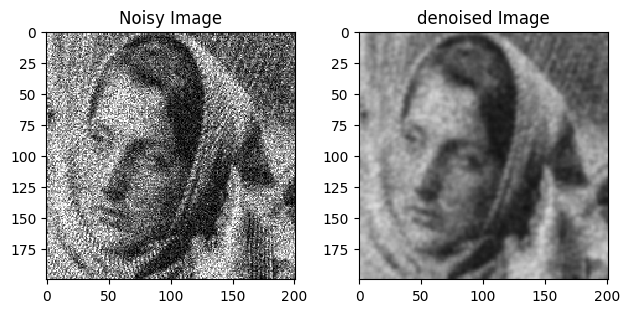

In [ ]:
from scipy import ndimage
image1 = imread('Noisy Image.png') # TO-BE-COMPLETED
plt.subplot(1,2,1)
plt.title("Noisy Image")
io.imshow(image1,cmap='gray')

sigma = 1.5
denoised_image = ndimage.gaussian_filter(image1, sigma)

plt.subplot(1,2,2)
plt.title("denoised Image")
io.imshow(denoised_image)

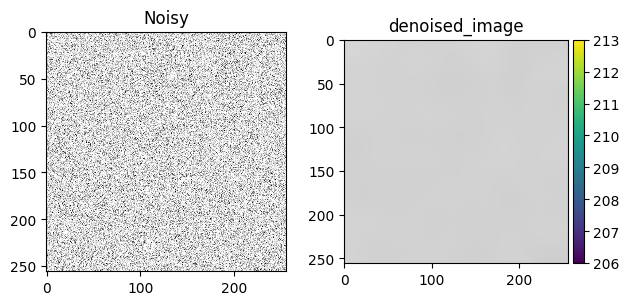

In [ ]:
image2 = imread('Noise.png') # TO-BE-COMPLETED
plt.subplot(1,2,1)
plt.title("Noisy")
io.imshow(image2)
sigma = 14
plt.subplot(1,2,2)
plt.title("denoised_image")
denoised_image1 = ndimage.gaussian_filter(image2, sigma)
io.imshow(denoised_image1)

### **Answer to Task 4** <br>

### Write your answer here. Subjectively speaking, how much 'sigma' value for each image was good enough for denosing in your opinion? How do too high (8,12,15 etc.) or too low (0.1, 0.01 etc.) 'sigma' values influence the images?


For picture1 sigma value 1.5 and picture2 sigma value 14 was good enough for denosing in my opinion.

If we consider sigma values 8, 12, and 15 for the picture, it makes the image too smooth and unclear. we lost details. but for picture2, make it one single color.

 For 0.1, it smooths the image a very little bit, which can be identified, and 0.01 cannot be identified because it looks like the original image.


## **The END**